In [3]:
# First, install the memory_profiler package
!pip install memory_profiler

# Then import the required libraries
import numpy as np
import matplotlib.pyplot as plt
from memory_profiler import memory_usage
import time
import itertools

In [4]:
# First, install the memory_profiler package
!pip install memory_profiler

# Then import the required modules
import matplotlib
import numpy
from memory_profiler import memory_usage
print("Environment is ready!")

Environment is ready!


In [5]:
def schedule_ads(ads):
    # ads is a list of tuples: (ad_id, deadline, profit)
    ads.sort(key=lambda x: x[2], reverse=True)
    n = len(ads)
    max_deadline = max(ad[1] for ad in ads)
    slots = [None] * max_deadline
    total_revenue = 0
    scheduled = []

    for ad in ads:
        for slot in range(min(max_deadline, ad[1]) - 1, -1, -1):
            if slots[slot] is None:
                slots[slot] = ad
                scheduled.append(ad[0])
                total_revenue += ad[2]
                break
    return scheduled, total_revenue

# Sample input
ads = [('A', 2, 100), ('B', 1, 19), ('C', 2, 27), ('D', 1, 25), ('E', 3, 15)]
scheduled, revenue = schedule_ads(ads)
print(f"Selected ads: {scheduled}, Total revenue: {revenue}")


Selected ads: ['A', 'C', 'E'], Total revenue: 142


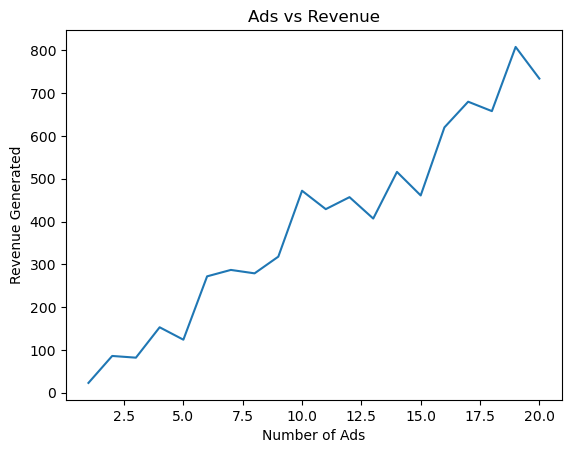

In [6]:
ads_counts = np.arange(1, 21)
revenues = []
for n in ads_counts:
    test_ads = [('Ad'+str(i), np.random.randint(1, n//2+2), np.random.randint(10, 100)) for i in range(n)]
    _, rev = schedule_ads(test_ads)
    revenues.append(rev)
plt.plot(ads_counts, revenues)
plt.xlabel("Number of Ads")
plt.ylabel("Revenue Generated")
plt.title("Ads vs Revenue")
plt.show()


In [7]:
def knapsack(weights, values, capacity):
    n = len(weights)
    dp = np.zeros((n+1, capacity+1), dtype=int)
    for i in range(1, n+1):
        for w in range(capacity+1):
            if weights[i-1] <= w:
                dp[i][w] = max(dp[i-1][w], dp[i-1][w-weights[i-1]] + values[i-1])
            else:
                dp[i][w] = dp[i-1][w]
    return dp[n][capacity]

weights = [2, 3, 4, 5]
values = [3, 4, 5, 6]
capacity = 5
print("Max profit:", knapsack(weights, values, capacity))


Max profit: 7


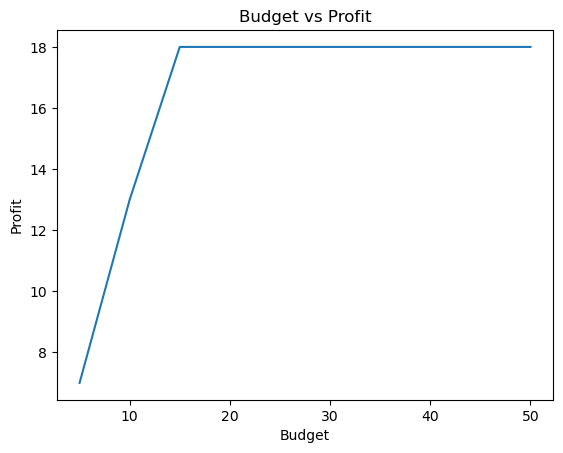

In [8]:
budgets = np.arange(5, 55, 5)
profs = []
for c in budgets:
    profs.append(knapsack(weights, values, c))
plt.plot(budgets, profs)
plt.xlabel("Budget")
plt.ylabel("Profit")
plt.title("Budget vs Profit")
plt.show()


In [9]:
def is_valid(board, row, col, num):
    for i in range(9):
        if board[row][i] == num or board[i][col] == num:
            return False
    box_x, box_y = row//3 * 3, col//3 * 3
    for i in range(box_x, box_x+3):
        for j in range(box_y, box_y+3):
            if board[i][j] == num:
                return False
    return True

def solve_sudoku(board):
    for i in range(9):
        for j in range(9):
            if board[i][j] == 0:
                for num in range(1, 10):
                    if is_valid(board, i, j, num):
                        board[i][j] = num
                        if solve_sudoku(board):
                            return True
                        board[i][j] = 0
                return False
    return True

sudoku = [[5,3,0,0,7,0,0,0,0],
          [6,0,0,1,9,5,0,0,0],
          [0,9,8,0,0,0,0,6,0],
          [8,0,0,0,6,0,0,0,3],
          [4,0,0,8,0,3,0,0,1],
          [7,0,0,0,2,0,0,0,6],
          [0,6,0,0,0,0,2,8,0],
          [0,0,0,4,1,9,0,0,5],
          [0,0,0,0,8,0,0,7,9]]
solve_sudoku(sudoku)
for row in sudoku:
    print(row)


[5, 3, 4, 6, 7, 8, 9, 1, 2]
[6, 7, 2, 1, 9, 5, 3, 4, 8]
[1, 9, 8, 3, 4, 2, 5, 6, 7]
[8, 5, 9, 7, 6, 1, 4, 2, 3]
[4, 2, 6, 8, 5, 3, 7, 9, 1]
[7, 1, 3, 9, 2, 4, 8, 5, 6]
[9, 6, 1, 5, 3, 7, 2, 8, 4]
[2, 8, 7, 4, 1, 9, 6, 3, 5]
[3, 4, 5, 2, 8, 6, 1, 7, 9]


In [10]:
def crack_password(password, charset):
    for l in range(1, len(password) + 1):
        for attempt in itertools.product(charset, repeat=l):
            attempt_str = ''.join(attempt)
            if attempt_str == password:
                return attempt_str, l

password = 'ab1'
charset = 'abc123'
found, attempts = crack_password(password, charset)
print(f"Password: {found}, Attempts: {attempts}")


Password: ab1, Attempts: 3


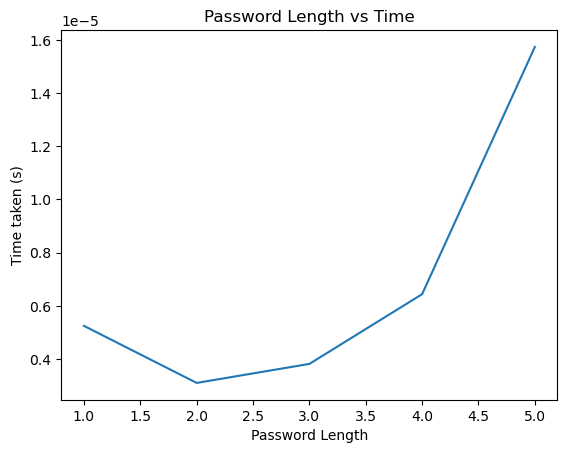

In [11]:
pw_lengths = range(1, 6)
times = []
for l in pw_lengths:
    pw = 'a' * l
    charset = 'abc'
    start = time.time()
    crack_password(pw, charset)
    times.append(time.time() - start)
plt.plot(pw_lengths, times)
plt.xlabel("Password Length")
plt.ylabel("Time taken (s)")
plt.title("Password Length vs Time")
plt.show()
